<a href="https://colab.research.google.com/github/quoctrung2005/TTNT/blob/main/KNN(DOAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

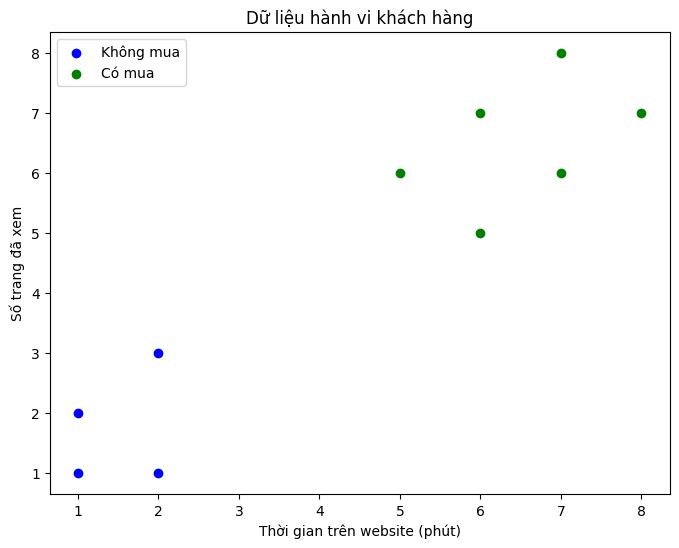


--- KẾT QUẢ DỰ ĐOÁN ---
DỰ ĐOÁN: KHÁCH HÀNG CÓ KHẢ NĂNG MUA HÀNG


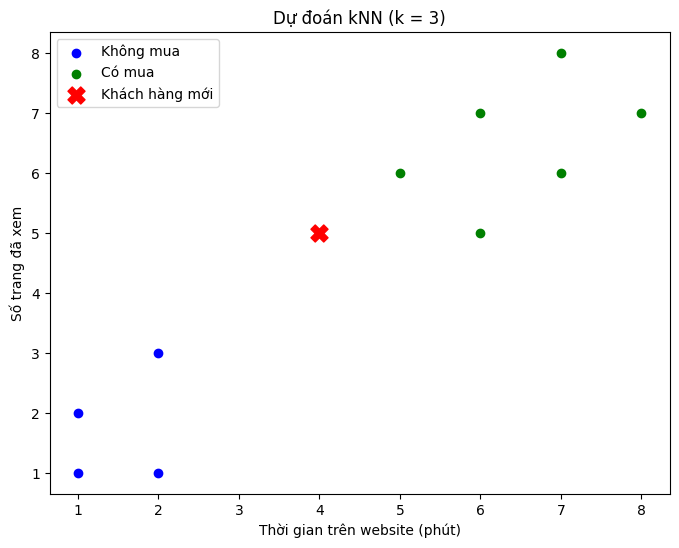

In [1]:
# ==========================================================
# BƯỚC 1: IMPORT THƯ VIỆN CƠ BẢN
# ==========================================================
import numpy as np
import matplotlib.pyplot as plt


# ==========================================================
# BƯỚC 2: ĐỊNH NGHĨA CLASS KNN
# ==========================================================
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    # Hàm lưu trữ dữ liệu huấn luyện
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Hàm tính khoảng cách Euclidean
    def euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    # Hàm dự đoán nhãn cho dữ liệu mới
    def predict(self, X_test):
        predictions = []

        for x_test in X_test:
            distances = []
            for i in range(len(self.X_train)):
                dist = self.euclidean_distance(x_test, self.X_train[i])
                distances.append((dist, self.y_train[i]))

            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.k]

            votes = {}
            for _, label in k_nearest:
                votes[label] = votes.get(label, 0) + 1

            predicted_label = max(votes, key=votes.get)
            predictions.append(predicted_label)

        return np.array(predictions)


# ==========================================================
# BƯỚC 3: KHỞI TẠO DỮ LIỆU HUẤN LUYỆN
# ==========================================================
X_train = np.array([
    [1, 2], [2, 1], [1, 1], [2, 3],
    [6, 7], [7, 6], [8, 7], [7, 8],
    [5, 6], [6, 5]
])

y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])


# ==========================================================
# BƯỚC 4: TRỰC QUAN HÓA DỮ LIỆU HUẤN LUYỆN
# ==========================================================
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', label='Không mua')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='green', label='Có mua')
plt.xlabel("Thời gian trên website (phút)")
plt.ylabel("Số trang đã xem")
plt.title("Dữ liệu hành vi khách hàng")
plt.legend()
plt.show()


# ==========================================================
# BƯỚC 5: TẠO MÔ HÌNH KNN VÀ DỰ ĐOÁN
# ==========================================================
k = 3
model = KNNClassifier(k=k)
model.fit(X_train, y_train)

# Ví dụ khách hàng mới
X_new = np.array([[4, 5]])
prediction = model.predict(X_new)

print("\n--- KẾT QUẢ DỰ ĐOÁN ---")
if prediction[0] == 1:
    print("DỰ ĐOÁN: KHÁCH HÀNG CÓ KHẢ NĂNG MUA HÀNG")
else:
    print("DỰ ĐOÁN: KHÁCH HÀNG KHÔNG MUA HÀNG")


# ==========================================================
# BƯỚC 6: TRỰC QUAN HÓA KẾT QUẢ DỰ ĐOÁN
# ==========================================================
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', label='Không mua')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='green', label='Có mua')
plt.scatter(X_new[:, 0], X_new[:, 1], c='red', marker='X', s=150, label='Khách hàng mới')
plt.xlabel("Thời gian trên website (phút)")
plt.ylabel("Số trang đã xem")
plt.title(f"Dự đoán kNN (k = {k})")
plt.legend()
plt.show()
